<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ford-GoBike-System-Data" data-toc-modified-id="Ford-GoBike-System-Data-1">Ford GoBike System Data</a></span><ul class="toc-item"><li><span><a href="#by-Joel-Minier-Matar" data-toc-modified-id="by-Joel-Minier-Matar-1.1">by Joel Minier-Matar</a></span></li><li><span><a href="#Preliminary-Wrangling" data-toc-modified-id="Preliminary-Wrangling-1.2">Preliminary Wrangling</a></span></li><li><span><a href="#Univariate-Exploration" data-toc-modified-id="Univariate-Exploration-1.3">Univariate Exploration</a></span></li><li><span><a href="#Bivariate-Exploration" data-toc-modified-id="Bivariate-Exploration-1.4">Bivariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?" data-toc-modified-id="Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?-1.4.1">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</a></span></li><li><span><a href="#Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?" data-toc-modified-id="Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?-1.4.2">Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?</a></span></li><li><span><a href="#What-is-the-structure-of-your-dataset?" data-toc-modified-id="What-is-the-structure-of-your-dataset?-1.4.3">What is the structure of your dataset?</a></span></li><li><span><a href="#What-is/are-the-main-feature(s)-of-interest-in-your-dataset?" data-toc-modified-id="What-is/are-the-main-feature(s)-of-interest-in-your-dataset?-1.4.4">What is/are the main feature(s) of interest in your dataset?</a></span></li><li><span><a href="#What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?" data-toc-modified-id="What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?-1.4.5">What features in the dataset do you think will help support your investigation into your feature(s) of interest?</a></span></li></ul></li><li><span><a href="#Univariate-Exploration" data-toc-modified-id="Univariate-Exploration-1.5">Univariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Discuss-the-distribution(s)-of-your-variable(s)-of-interest.-Were-there-any-unusual-points?-Did-you-need-to-perform-any-transformations?" data-toc-modified-id="Discuss-the-distribution(s)-of-your-variable(s)-of-interest.-Were-there-any-unusual-points?-Did-you-need-to-perform-any-transformations?-1.5.1">Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?</a></span></li><li><span><a href="#Of-the-features-you-investigated,-were-there-any-unusual-distributions?-Did-you-perform-any-operations-on-the-data-to-tidy,-adjust,-or-change-the-form-of-the-data?-If-so,-why-did-you-do-this?" data-toc-modified-id="Of-the-features-you-investigated,-were-there-any-unusual-distributions?-Did-you-perform-any-operations-on-the-data-to-tidy,-adjust,-or-change-the-form-of-the-data?-If-so,-why-did-you-do-this?-1.5.2">Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?</a></span></li></ul></li><li><span><a href="#Bivariate-Exploration" data-toc-modified-id="Bivariate-Exploration-1.6">Bivariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?" data-toc-modified-id="Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?-1.6.1">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</a></span></li><li><span><a href="#Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?" data-toc-modified-id="Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?-1.6.2">Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?</a></span></li></ul></li><li><span><a href="#Multivariate-Exploration" data-toc-modified-id="Multivariate-Exploration-1.7">Multivariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-Were-there-features-that-strengthened-each-other-in-terms-of-looking-at-your-feature(s)-of-interest?" data-toc-modified-id="Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-Were-there-features-that-strengthened-each-other-in-terms-of-looking-at-your-feature(s)-of-interest?-1.7.1">Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</a></span></li><li><span><a href="#Were-there-any-interesting-or-surprising-interactions-between-features?" data-toc-modified-id="Were-there-any-interesting-or-surprising-interactions-between-features?-1.7.2">Were there any interesting or surprising interactions between features?</a></span></li></ul></li><li><span><a href="#Plots-for-presentation" data-toc-modified-id="Plots-for-presentation-1.8">Plots for presentation</a></span></li></ul></li></ul></div>

# Ford GoBike System Data
###    by Joel Minier-Matar

## Preliminary Wrangling

> The ford wheels dataset contains information about bycicle rides for subscribers and customer. The set has the duration in seconds for each ride as well as the starting and ending stations with their coordinates. It also has information about the method used to rent the bike (app or dipper) and about bike sharing rides.

> For this study we will be looking at data for a full year from the beginning of April 2019 to the end of March 2020, over 2 million records will be analyzed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests, zipfile, io
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

Downloading dataset programmatically in case we need to add additional files in the future and storing the filenames in a list to load it into Pandas

In [265]:

#Data source: https://www.lyft.com/bikes/bay-wheels/system-data
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    url='https://s3.amazonaws.com/baywheels-data/'+file_date+'-'+name+'-tripdata.csv.zip'
    data_file = requests.get(url)
    zip_data = zipfile.ZipFile(io.BytesIO(data_file.content))
    zip_data.extractall("data")
    print(url.split('/')[-1][:-4])#printing the filename to track the downloaded files



201904-fordgobike-tripdata.csv
201905-baywheels-tripdata.csv
201906-baywheels-tripdata.csv
201907-baywheels-tripdata.csv


ConnectionError: HTTPSConnectionPool(host='s3.amazonaws.com', port=443): Max retries exceeded with url: /baywheels-data/201908-baywheels-tripdata.csv.zip (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa47a03e0d0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [2]:
#creating filename list to load files into pandas
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
filenames=[]
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    filenames.append(file_date+'-'+name+'-tripdata.csv')
filenames


['201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '202001-baywheels-tripdata.csv',
 '202002-baywheels-tripdata.csv',
 '202003-baywheels-tripdata.csv']

In [3]:
#loading all the data files into a single dataframe
df=pd.DataFrame()
for name in filenames:    
    data=pd.read_csv("data\\"+name)
    df=pd.concat([df,data])
    
df.info()

C:\PROGRA~1\Continuum\Anaconda3\envs\Udacity\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\PROGRA~1\Continuum\Anaconda3\envs\Udacity\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\PROGRA~1\Continuum\Anaconda3\envs\Udacity\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780197 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 339.4+ MB


The warning above is related to different datatype on the `bike_share_for_all_trip` and `rental_access_method`columns since some dataset only have one of the two columns. Those varibables have been added each to a separate column filling the missing values with NaN.

In [4]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            566370
start_station_name          564536
start_station_latitude           0
start_station_longitude          0
end_station_id              568018
end_station_name            566192
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip    1148266
rental_access_method       2041501
dtype: int64

(array([2.780195e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([6.00000e+01, 9.12650e+04, 1.82470e+05, 2.73675e+05, 3.64880e+05,
        4.56085e+05, 5.47290e+05, 6.38495e+05, 7.29700e+05, 8.20905e+05,
        9.12110e+05]),
 <a list of 10 Patch objects>)

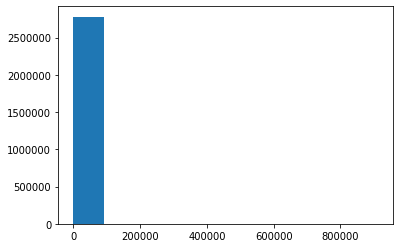

In [165]:
plt.hist(df['duration_sec']);

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.780197e+06,2.213827e+06,2.780197e+06,2.780197e+06,2.212179e+06,2.780197e+06,2.780197e+06,2.780197e+06
mean,8.166443e+02,1.544218e+02,3.775789e+01,-1.223509e+02,1.494351e+02,3.775695e+01,-1.223467e+02,1.365178e+05
std,1.899538e+03,1.300140e+02,1.783507e-01,4.679862e-01,1.289548e+02,2.707893e-01,8.093102e-01,2.511721e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00
25%,3.690000e+02,5.000000e+01,3.776710e+01,-1.224167e+02,4.300000e+01,3.776811e+01,-1.224147e+02,2.299000e+03
50%,5.880000e+02,1.090000e+02,3.777874e+01,-1.224000e+02,1.040000e+02,3.777877e+01,-1.223991e+02,9.787000e+03
75%,9.150000e+02,2.470000e+02,3.779423e+01,-1.223898e+02,2.440000e+02,3.779455e+01,-1.223898e+02,1.514520e+05
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


There are some very large durations that we need to remove

In [4]:
df.duration_sec.quantile(0.99)

4060.0

In [5]:
df[df['duration_sec']>=4060].count()

duration_sec               27803
start_time                 27803
end_time                   27803
start_station_id           23092
start_station_name         23108
start_station_latitude     27803
start_station_longitude    27803
end_station_id             22568
end_station_name           22587
end_station_latitude       27803
end_station_longitude      27803
bike_id                    27803
user_type                  27803
bike_share_for_all_trip    16732
rental_access_method        6356
dtype: int64

The `bike_share_for_all_trip` and `rental_access_method` columns have some missing values to keep in mind while analyzing the data


### Quality Issues
- Remove entries with durations above the 95 percentile (1803 sec)
- Convert `start time` and `end_time` to timestamp
- Add start months and year
- `bike_share_for_all_trip`, `rental_access_method`, and `user_type` will be converted to categorical data type 

Making a copy of the database

In [6]:
df_clean=df.copy()

In [7]:
df_clean=df_clean[df_clean['duration_sec']<=4060]
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.752401e+06,2.190740e+06,2.752401e+06,2.752401e+06,2.189616e+06,2.752401e+06,2.752401e+06,2.752401e+06
mean,7.138244e+02,1.539936e+02,3.775783e+01,-1.223507e+02,1.486301e+02,3.775768e+01,-1.223491e+02,1.367143e+05
std,5.182559e+02,1.295616e+02,1.788484e-01,4.692365e-01,1.282719e+02,2.069899e-01,5.781337e-01,2.513152e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.670000e+02,5.000000e+01,3.776710e+01,-1.224165e+02,4.300000e+01,3.776794e+01,-1.224139e+02,2.299000e+03
50%,5.830000e+02,1.090000e+02,3.777874e+01,-1.223998e+02,1.040000e+02,3.777877e+01,-1.223991e+02,9.789000e+03
75%,9.010000e+02,2.460000e+02,3.779416e+01,-1.223896e+02,2.430000e+02,3.779450e+01,-1.223896e+02,1.530070e+05
max,4.060000e+03,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


In [8]:
df_clean.start_time=pd.to_datetime(df_clean.start_time)
df_clean.end_time=pd.to_datetime(df_clean.end_time)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752401 entries, 4 to 176798
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 336.0+ MB


Adding a column with the month and year of the entry. That will be used to assess monthly trends

In [10]:
df_clean['hour']=df_clean['start_time'].dt.hour
df_clean['weekday']=df_clean['start_time'].dt.day_name()
df_clean['weekday']=df_clean['weekday'].astype('category')
df_clean.weekday.cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, inplace=True)
df_clean['period']=df_clean['start_time'].dt.month_name()+'-'+(pd.DatetimeIndex(df_clean['start_time']).year).astype(str)
df_clean['period']=df_clean['period'].astype('category')
#Setting order for the period category
df_clean.period.cat.reorder_categories(['April-2019', 'May-2019', 'June-2019', 'July-2019', 'August-2019', 'September-2019', 'October-2019', 'November-2019', 'December-2019', 'January-2020', 'February-2020', 'March-2020', 'April-2020'], ordered=True, inplace=True)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,hour,weekday,period
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,NaN,23,Tuesday,April-2019
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,No,NaN,23,Tuesday,April-2019
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,Yes,NaN,23,Tuesday,April-2019
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,No,NaN,23,Tuesday,April-2019
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,No,NaN,23,Tuesday,April-2019


In [11]:
df_clean.user_type=df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip=df_clean.bike_share_for_all_trip.astype('category')
df_clean.rental_access_method=df_clean.rental_access_method.astype('category')
#Setting order for the user_type categories
df_clean.user_type.cat.reorder_categories(['Subscriber','Customer'], ordered=True, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752401 entries, 4 to 176798
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  hour                     int64         
 16  weekday                  category      
 17  period                   cat

### What is the structure of your dataset?

> The data set consist of one quantitative data (Duration in seconds) and several qualitative data fields: starting and ending station IDs and Names as well as the method of renting the bike and the type of user (subscriber or customer).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest are the duration of each ride as well as the type of customer. That will tell which group is the main user of the bike system. Also the method of renting the bike and the usage based on the day of the week.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration, trip day (weekday or weekend), type of user and start/end trip stations.

## Univariate Exploration

> Now that we adjusted our dataset, we will look for some trends.

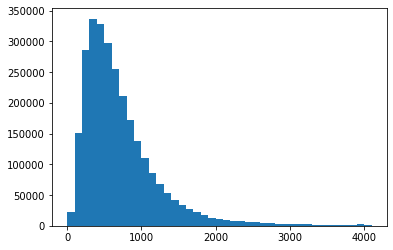

In [135]:
bin_edges = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(df_clean['duration_sec'], bins = bin_edges);

The histogram for the time duration of each ride shows that is on average around 700 seconds (11-12 min) and it shows an exponential decline towards higher duration.

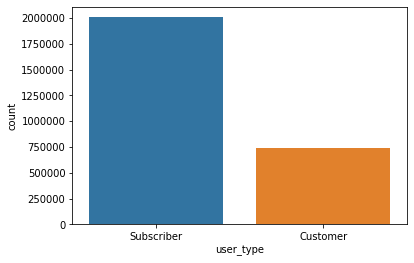

In [134]:
sns.countplot(data=df_clean,x='user_type')

Let's check the same distribution as percentage

Subscriber    72.934721
Customer      27.065279
Name: user_type, dtype: float64


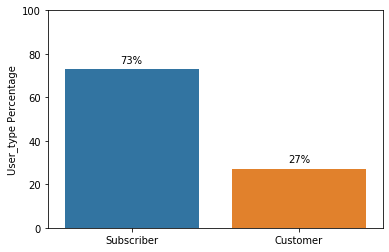

In [20]:
typepercent=df_clean.user_type.value_counts(normalize=True).apply(lambda x: x*100)
print (typepercent)
fig, ax = plt.subplots(1,1)
sns.barplot(x=typepercent.index,y=typepercent)
plt.ylim(0,100)
plt.ylabel('User_type Percentage')
rects=ax.patches
for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., h+2,'{:0.0f}%'.format(h), ha='center', va='bottom');

From the bike system user, over the year in consideration, 73% of the users are subscribers while 27% are customer

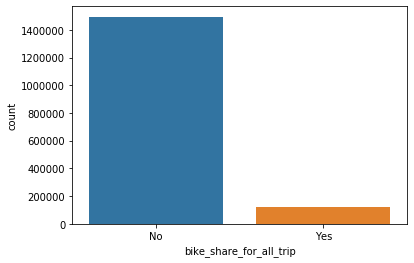

In [71]:
sns.countplot(data=df_clean,x='bike_share_for_all_trip')

Let's check the same distribution as percentage

No     0.925025
Yes    0.074975
Name: bike_share_for_all_trip, dtype: float64


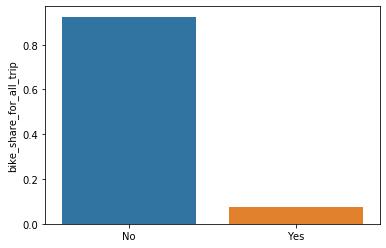

In [72]:
typepercent=df_clean.bike_share_for_all_trip.value_counts(normalize=True)
print (typepercent)
sns.barplot(x=typepercent.index,y=typepercent);

Most of the rides (~92%) are not share rides. This that is only based on the availabe since few months do not have bike share data

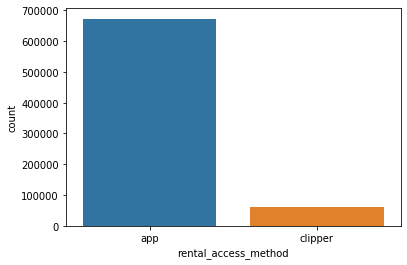

In [73]:
sns.countplot(data=df_clean,x='rental_access_method')

Let's check the same distribution as percentage

app        0.918119
clipper    0.081881
Name: rental_access_method, dtype: float64


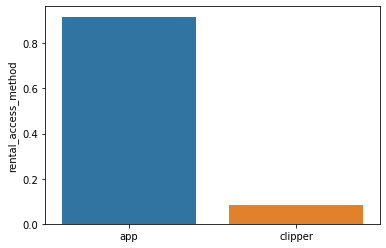

In [74]:
typepercent=df_clean.rental_access_method.value_counts(normalize=True)
print (typepercent)
sns.barplot(x=typepercent.index,y=typepercent);

90% of the rides are rented from the app. This data is also based on the available data since few months do not have rental access data.

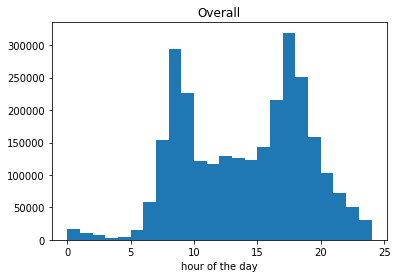

In [183]:
bin_data=range(0,25,1)
plt.hist(df_clean.start_time.dt.hour, bins=bin_data)
plt.xlabel('hour of the day')
plt.title("Overall");

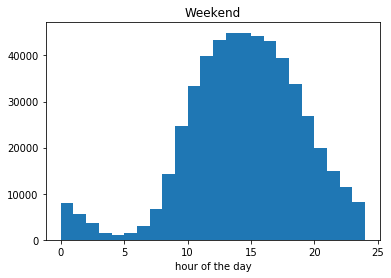

In [187]:
bin_data=range(0,25,1)
plt.hist(df_clean.query('weekday=="Sunday" or weekday=="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day')
plt.title("Weekend");

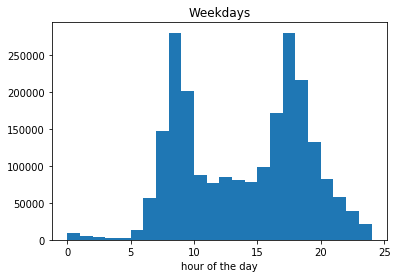

In [186]:
bin_data=range(0,25,1)
plt.hist(df_clean.query('weekday!="Sunday" and weekday!="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day')
plt.title("Weekdays");

The bimodal distribution above showed that the peak time for bike ride are in the morning between 6-9 am and in the evening between 4-7 pm

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of each trip had some very large numbers. To be able to visualize the data correctly, I removed points above the 99 percentile.

> I also did some transformations from counts to percentace to determine the percentage distribution for some categories. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  I noticed a bimodal distrubution for the number of trip depending on the hour of the day. We will explore this further to see if other factors affect the number of trips

> Regarding wrangling efforts, I converted the time data into numpy datetime datatype to be able to extract the month and the year of each trip for grouping purposes. I also change some datatypes to ordered category to be able to plot the data correctly

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables

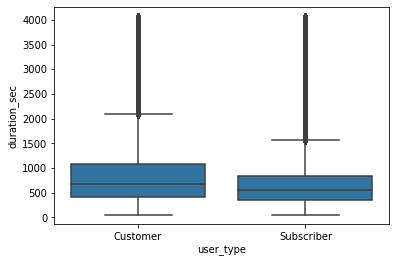

In [76]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec', color = base_color)


The box plot showed that the subcribers on average had slightly lower duration time compared to customers, as well as lower quartiles

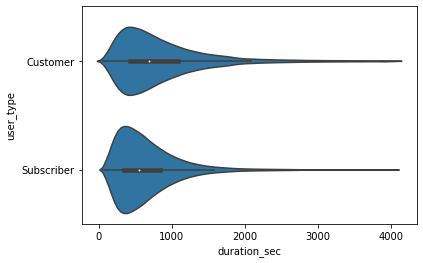

In [77]:
base_color = sns.color_palette()[0]
sns.violinplot(data = df_clean, y = 'user_type', x = 'duration_sec', color = base_color)


The violin plot is similar to the box plot, and it showed that the time distribution is unimodal for both category. In this case, the box plot seems to be more explanatory

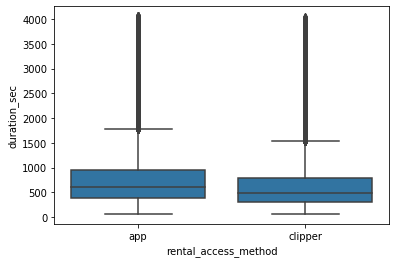

In [78]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df_clean, x = 'rental_access_method', y = 'duration_sec', color = base_color)


The rides for rental using the app have a slightly longer average duration compared to those from the clipper. The box plot also showed that data above 2000 sec are above 1.5 STD

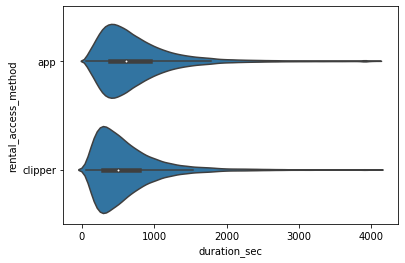

In [79]:
base_color = sns.color_palette()[0]
sns.violinplot(data = df_clean, y = 'rental_access_method', x = 'duration_sec', color = base_color)


The violin plot is similar to the box plot, and it showed that the time distribution is unimodal for both rental category.  In this case, the box plot seems to be more explanatory

weekday
Monday       686.558851
Tuesday      677.838786
Wednesday    683.543850
Thursday     683.614887
Friday       703.908686
Saturday     833.599928
Sunday       825.678880
Name: duration_sec, dtype: float64


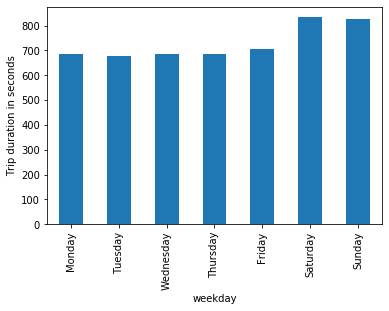

In [215]:
time_vs_day=df_clean.groupby(['weekday']).mean()['duration_sec']
print (time_vs_day)
plt.ylabel('Trip duration in seconds')
time_vs_day.plot.bar();

There is a slightly increase on the average duration time on weekend compared to weekdays

Text(0, 0.5, 'Trip duration - Percentage based on average')

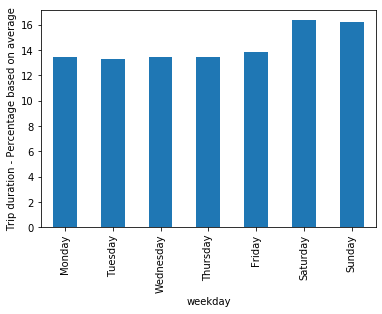

In [214]:
(time_vs_day/time_vs_day.sum()).apply(lambda x: x*100).plot.bar()
plt.ylabel('Trip duration - Percentage based on average');

The increase is apprxiamtely 2 to 3%

Now let's check with stations are more popular and what are the peak time for those stations

In [42]:
stations=df_clean['start_station_name'].value_counts().rename_axis('start_station_name').reset_index(name='counts')
station_10_start=stations.head(10)
station_10_start

,start_station_name,counts
0,Market St at 10th St,39441
1,Berry St at 4th St,39293
2,San Francisco Caltrain (Townsend St at 4th St),38540
3,San Francisco Ferry Building (Harry Bridges Pl...,32798
4,Montgomery St BART Station (Market St at 2nd St),30365
5,Powell St BART Station (Market St at 4th St),29037
6,Howard St at Beale St,28695
7,Powell St BART Station (Market St at 5th St),26528
8,Steuart St at Market St,24694
9,San Francisco Caltrain Station 2 (Townsend St...,24392


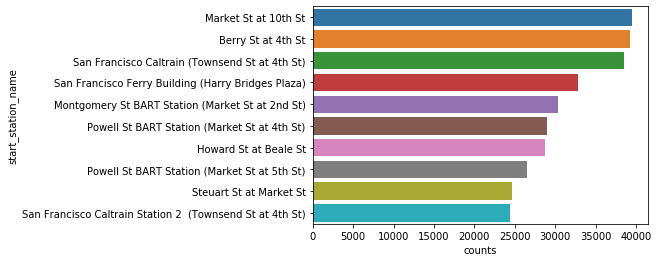

In [43]:
sns.barplot(data=station_10_start,y='start_station_name',x='counts', order=station_10_start.start_station_name);

Market St, Berry St and San Francisco Caltrain stations are the most popular stations to start a ride. Let's check the time distribution for the first station: Market st.

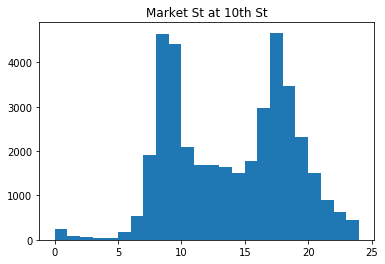

In [44]:
bin_data=range(0,25,1)
plt.hist(df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]]['start_time'].dt.hour, bins=bin_data)
plt.title(station_10_start.start_station_name[0]);

The plot above showed a bimodal distribution for the trips from the Market st station are from 8-10 am and from 4 to 7 pm.

In [45]:
stations_end=df_clean['end_station_name'].value_counts().rename_axis('end_station_name').reset_index(name='counts')
station_10_end=stations_end.head(10)
station_10_end

,end_station_name,counts
0,San Francisco Caltrain (Townsend St at 4th St),54855
1,Montgomery St BART Station (Market St at 2nd St),43460
2,San Francisco Ferry Building (Harry Bridges Pl...,42311
3,Berry St at 4th St,39680
4,Market St at 10th St,38672
5,San Francisco Caltrain Station 2 (Townsend St...,34840
6,Powell St BART Station (Market St at 4th St),32871
7,Powell St BART Station (Market St at 5th St),27664
8,Howard St at Beale St,27458
9,The Embarcadero at Sansome St,26521


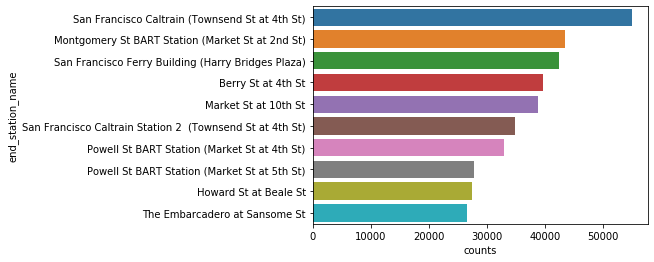

In [46]:
sns.barplot(data=station_10_end,y='end_station_name',x='counts', order=station_10_end.end_station_name)

San Francisco Caltrain stations seems to be the most popular station to end a ride. Let's check the time distribution for the this station.

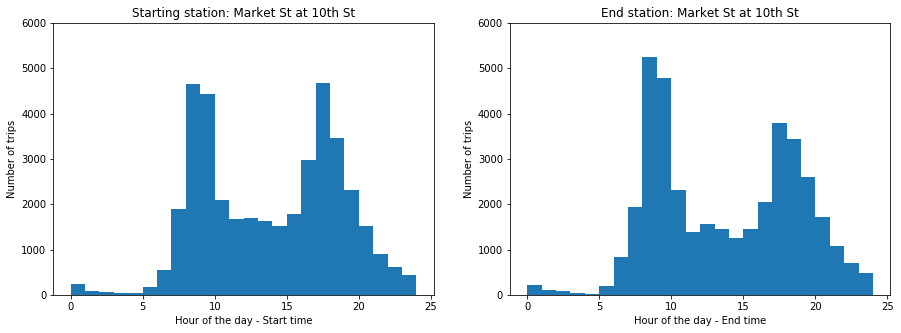

In [64]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[0])
plt.xlabel('Hour of the day - Start time')
plt.ylabel ('Number of trips')
plt.ylim(0,6000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df_clean[df_clean.end_station_name==station_10_end.end_station_name[4]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[4])
plt.xlabel('Hour of the day - End time')
plt.ylabel ('Number of trips')
plt.ylim(0,6000);

The plots above showed the number of rides starting (left) and ending (right) at the Market St at 10th St station at differnt time of the day.

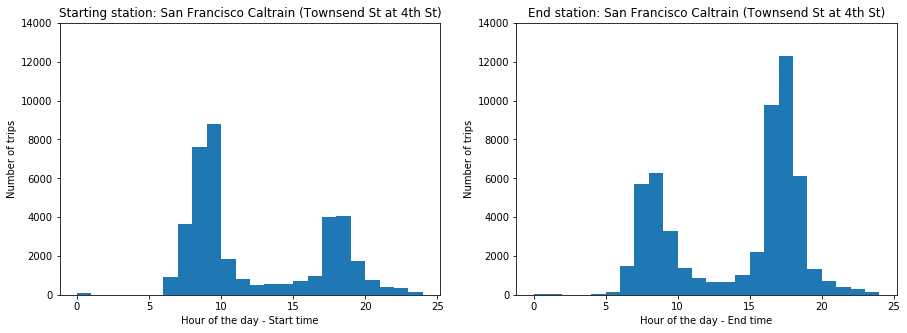

In [63]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean.start_station_name==station_10_start.start_station_name[2]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[2])
plt.xlabel('Hour of the day - Start time')
plt.ylabel ('Number of trips')
plt.ylim(0,14000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df_clean[df_clean.end_station_name==station_10_end.end_station_name[0]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[0])
plt.xlabel('Hour of the day - End time')
plt.ylabel ('Number of trips')
plt.ylim(0,14000);

The plots above showed the number of rides starting (left) and ending (right) at the San Francisco Caltrain station at differnt time of the day. The biggest peak is an ending station in the evenings

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We observed that the time distribution varies depending on which station we are looking at; and that could give us an indication when to expect higher demands in different locations.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We noticed a difference in the average trip duration for the different user type: customer and subscriber. Also, there seems to be an increase in the average duration (approximatley 3%) for rides taking on weekends compared to weekdays.

## Multivariate Exploration

> Now we will explore additonal correlation between variables, like the monthly trends

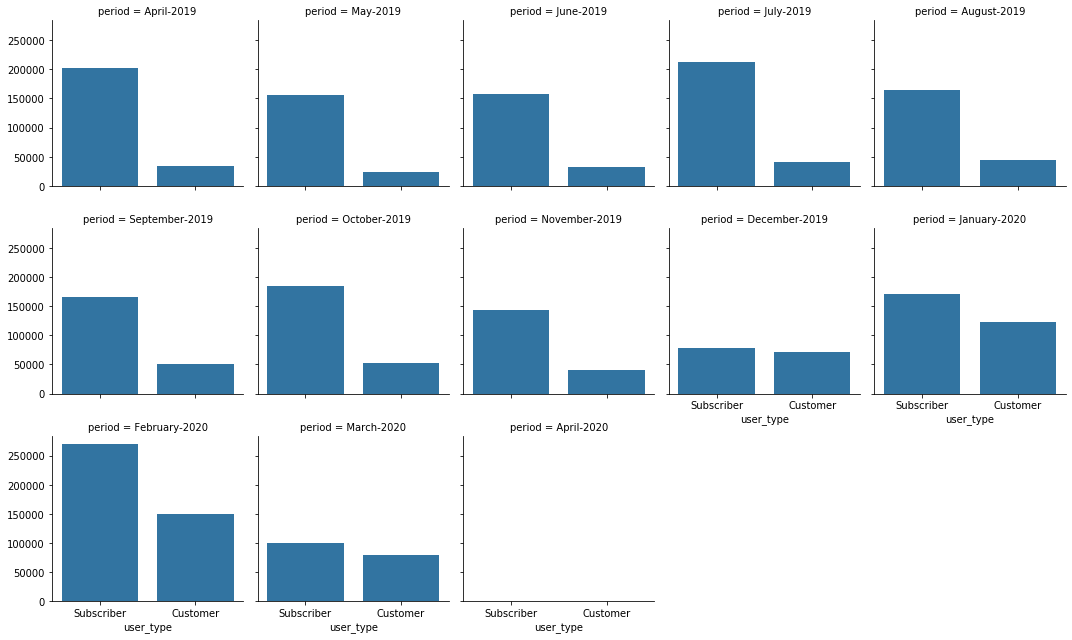

In [143]:
g = sns.FacetGrid(data = df_clean, col = 'period', col_wrap=5)
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'])

Type of users per month showed that subcriber are dominant. it is interesting that the number of trips in April 2020 is the lowest possible due to the COVID-19 lockdown restrictions. The highest number of trips was in February, possible to the end of winter...

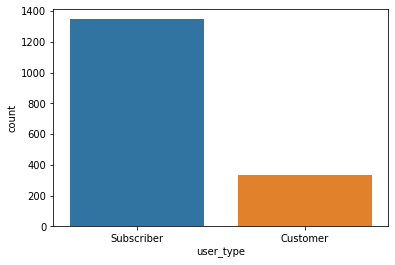

In [87]:
sns.countplot(x=df_clean[df_clean['period']=='April-2020'].user_type, order=['Subscriber','Customer'])

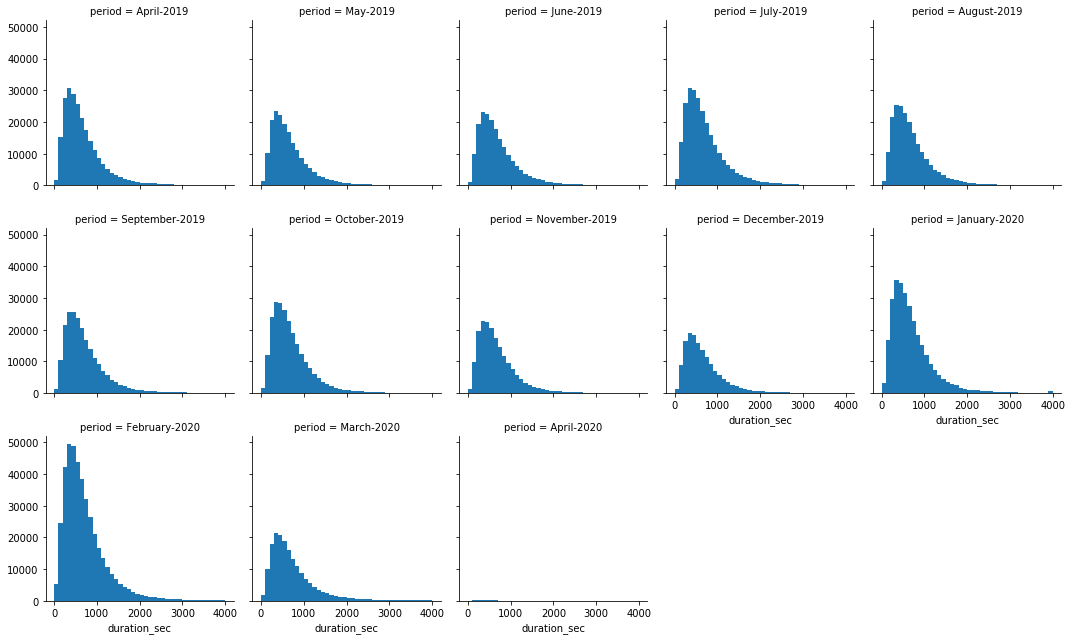

In [160]:
bin_edges = np.arange(0, 4000+100, 100)

g = sns.FacetGrid(data =df_clean, col = 'period', col_wrap=5)
g.map(plt.hist,'duration_sec',bins=bin_edges)
#plt.xlim(0,5000)

The histogram facegrid also showed the same trend for April 2020

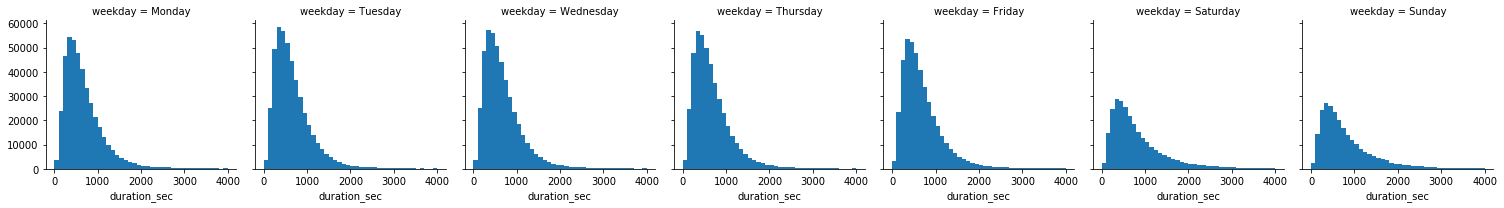

In [194]:
bin_edges = np.arange(0, 4000+100, 100)

g = sns.FacetGrid(data =df_clean, col= 'weekday')
g.map(plt.hist,'duration_sec',bins=bin_edges)
#plt.xlim(0,5000)

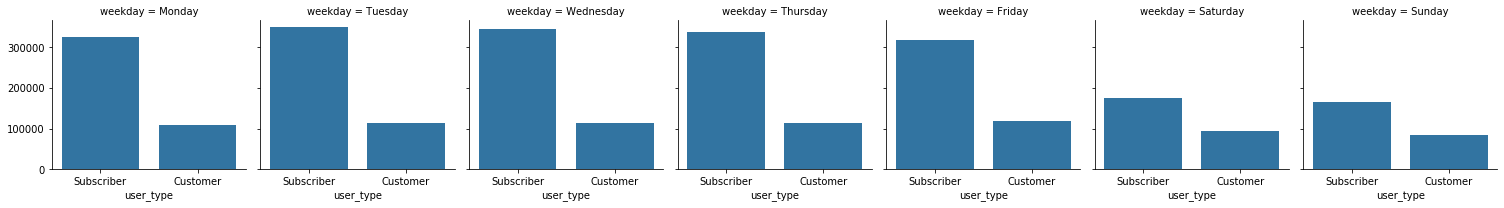

In [21]:
g = sns.FacetGrid(data = df_clean, col = 'weekday')
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'])
#plt.xlim(0,5000)

The percentage of subcriber compared to customer is higher in weekdays than weekends.

Based on the plot above, the bke system is used more during weekdays than weekends.

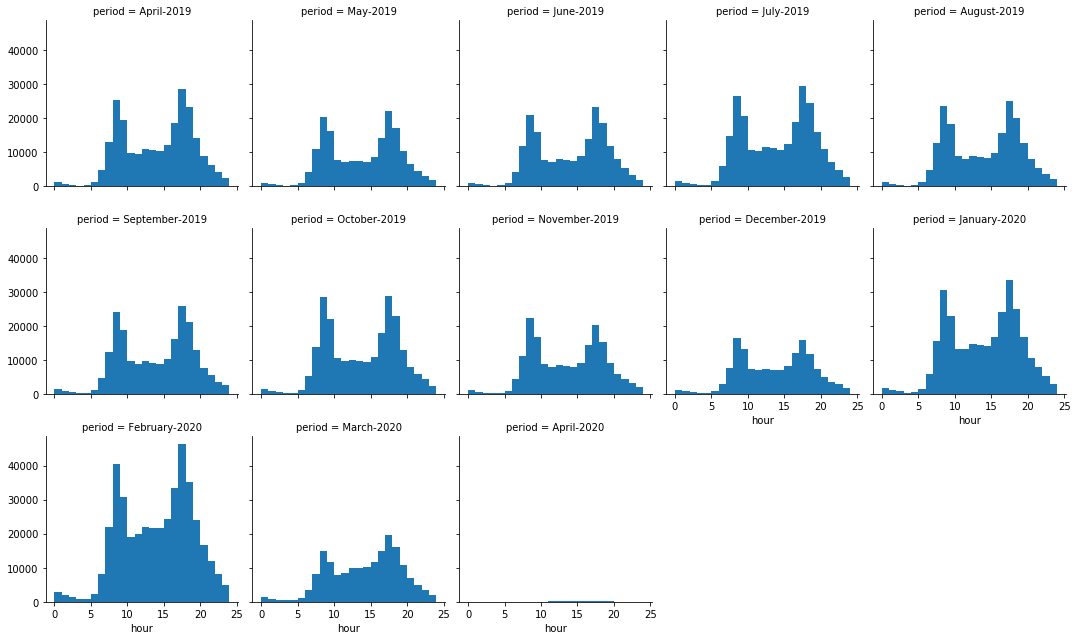

In [168]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df_clean, col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data)


Market St at 10th St


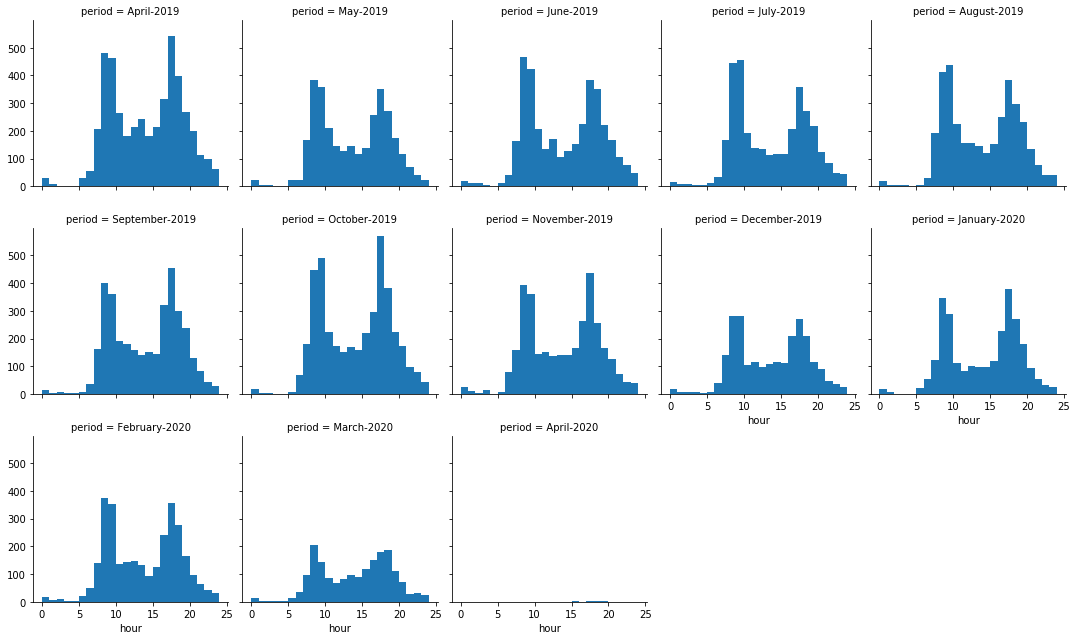

In [47]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]], col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data);
print(station_10_start.start_station_name[0])

Market St at 10th St


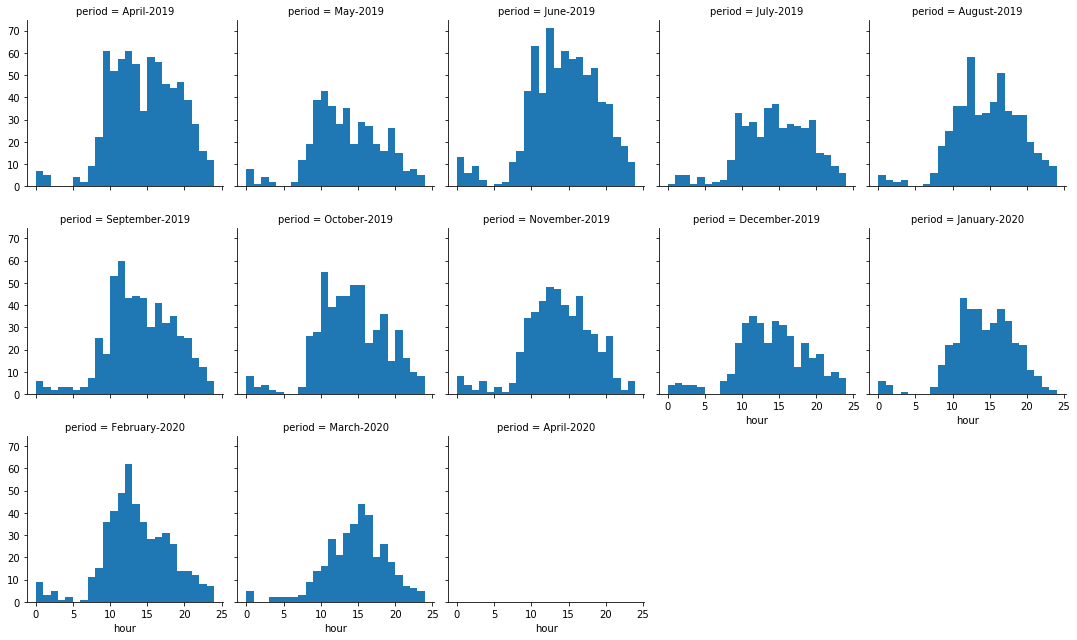

In [48]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]].query('weekday=="Sunday" or weekday=="Saturday"'), col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data);
print(station_10_start.start_station_name[0])

Market St at 10th St


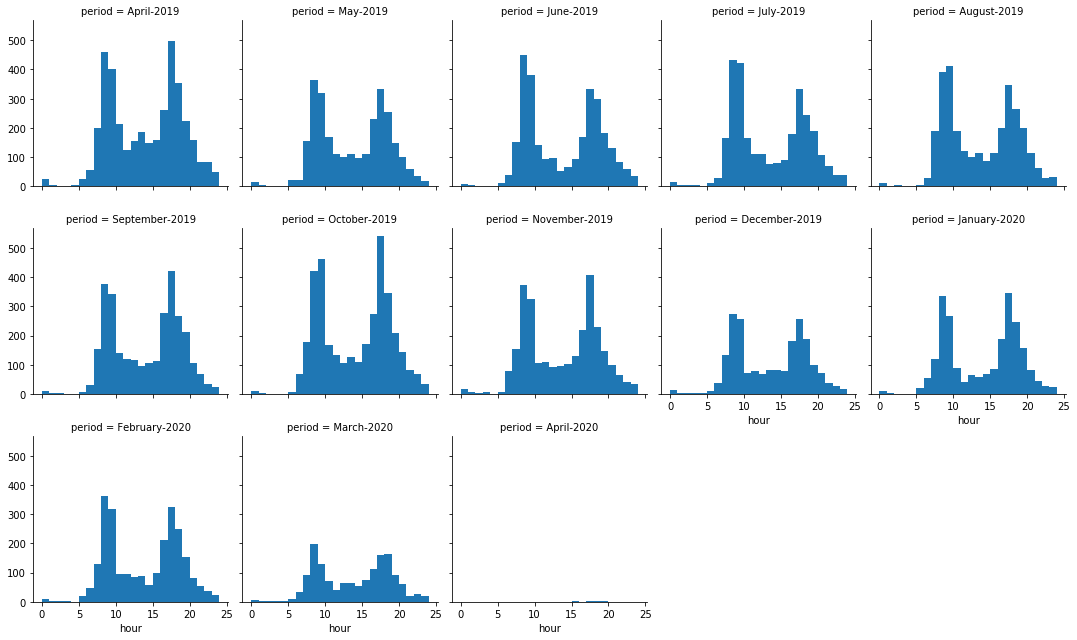

In [49]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]].query('weekday!="Sunday" and weekday!="Saturday"'), col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data);
print(station_10_start.start_station_name[0])

The histogram facegrid also showed the same trend for April 2020

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The monthly trends revealed a decrease on rides in April 2020 due to the COVD-19 lockdown. The data also showed an increase in rides on February 2020; possible due to the end of winter and better weather for riding.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to see the different patterns between the weekdays and weekend rides. During weekdays, most of the rides are in peak hours (7-10 am and 4-6 pm), while in weekends the rides are mainly in the afternoon. I also observed that weekdays rides are mainly done by subcriber with a low percentage of customer while on weekend the percentage of subscriber and customer are close to each other.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## Plots for presentation

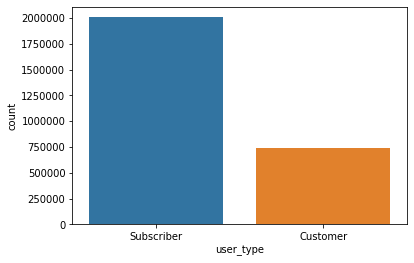

In [134]:
sns.countplot(data=df_clean,x='user_type')

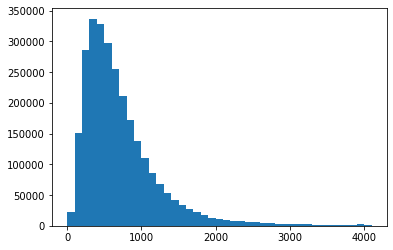

In [135]:
bin_edges = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(df_clean['duration_sec'], bins = bin_edges);

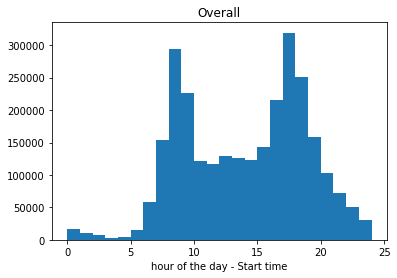

In [22]:
bin_data=range(0,25,1)
plt.hist(df_clean.start_time.dt.hour, bins=bin_data)
plt.xlabel('hour of the day - Start time')
plt.title("Overall");

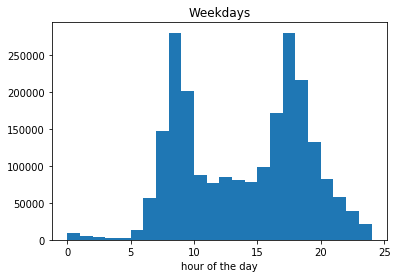

In [186]:
bin_data=range(0,25,1)
plt.hist(df_clean.query('weekday!="Sunday" and weekday!="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day')
plt.title("Weekdays");

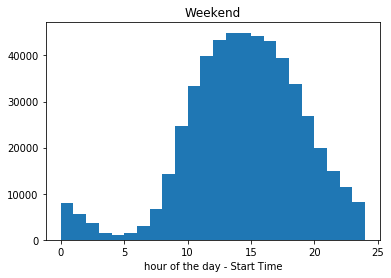

In [23]:
bin_data=range(0,25,1)
plt.hist(df_clean.query('weekday=="Sunday" or weekday=="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day - Start Time')
plt.title("Weekend");

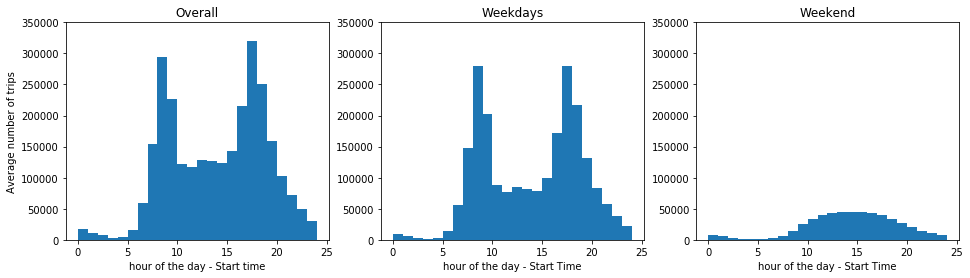

In [40]:
plt.figure(figsize = [16, 4])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)


# left plot: overall data
plt.subplot(1, 3, 1)
plt.hist(df_clean.start_time.dt.hour, bins=bin_data)
plt.xlabel('hour of the day - Start time')
plt.title("Overall")
plt.ylim(0,350000)
plt.ylabel('Average number of trips')
# middle plot: weekdays
plt.subplot(1, 3, 2)
plt.hist(df_clean.query('weekday!="Sunday" and weekday!="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day - Start Time')
plt.title("Weekdays")
plt.ylim(0,350000)
#plt.ylabel('Average number of trips')
# left plot: weekend
plt.subplot(1, 3, 3)
plt.hist(df_clean.query('weekday=="Sunday" or weekday=="Saturday"')['hour'], bins=bin_data)
plt.xlabel('hour of the day - Start Time')
plt.title("Weekend")
plt.ylim(0,350000);
#plt.ylabel('Average number of trips');


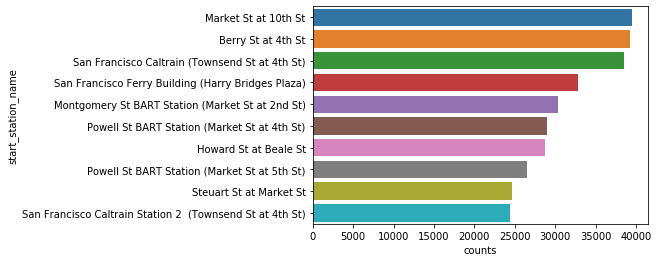

In [43]:
sns.barplot(data=station_10_start,y='start_station_name',x='counts', order=station_10_start.start_station_name);

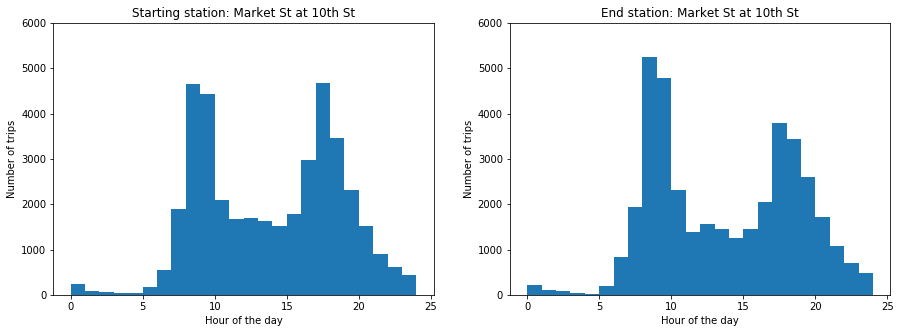

In [52]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot: violin plot
plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean.start_station_name==station_10_start.start_station_name[0]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[0])
plt.xlabel('Hour of the day')
plt.ylabel ('Number of trips')
plt.ylim(0,6000)
# right plot: box plot
plt.subplot(1, 2, 2)
plt.hist(df_clean[df_clean.end_station_name==station_10_end.end_station_name[4]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[4])
plt.xlabel('Hour of the day')
plt.ylabel ('Number of trips')
plt.ylim(0,6000);

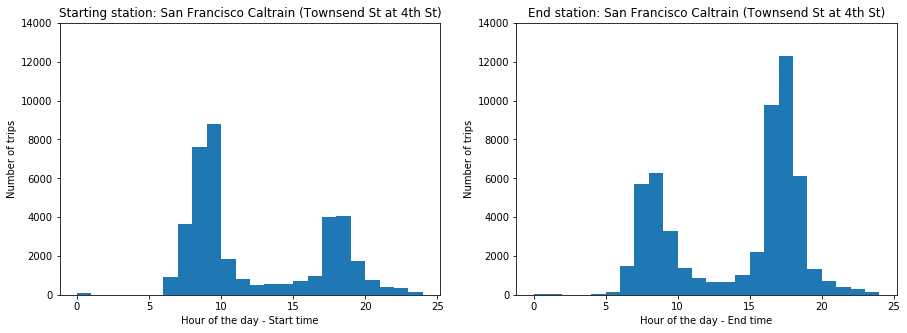

In [63]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean.start_station_name==station_10_start.start_station_name[2]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[2])
plt.xlabel('Hour of the day - Start time')
plt.ylabel ('Number of trips')
plt.ylim(0,14000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df_clean[df_clean.end_station_name==station_10_end.end_station_name[0]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[0])
plt.xlabel('Hour of the day - End time')
plt.ylabel ('Number of trips')
plt.ylim(0,14000);

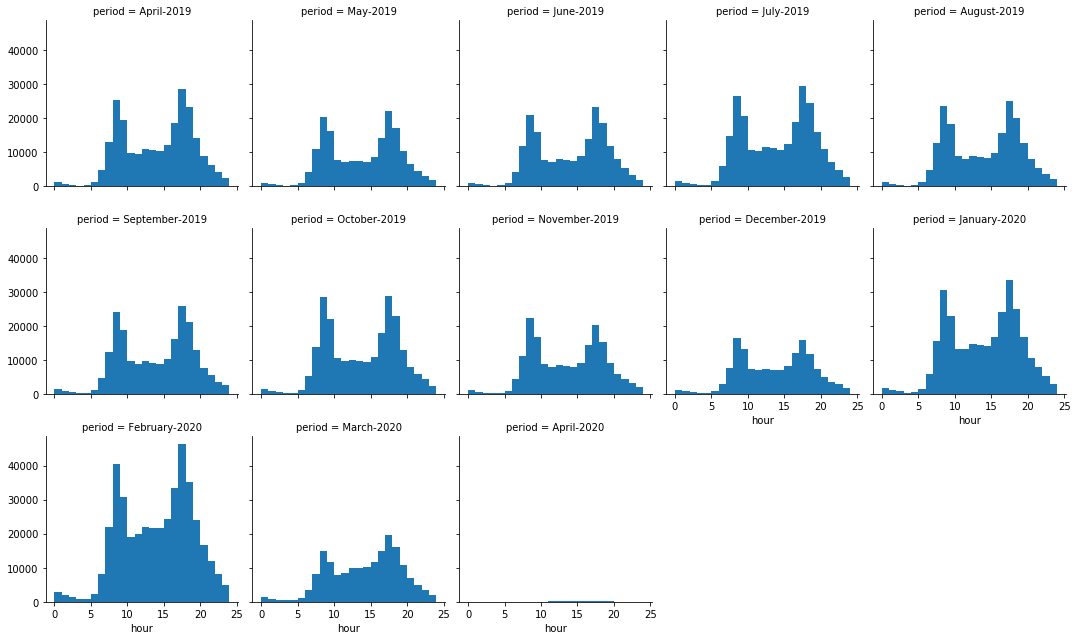

In [168]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df_clean, col = 'period', col_wrap=5)
g.map(plt.hist,'hour',bins=bin_data)


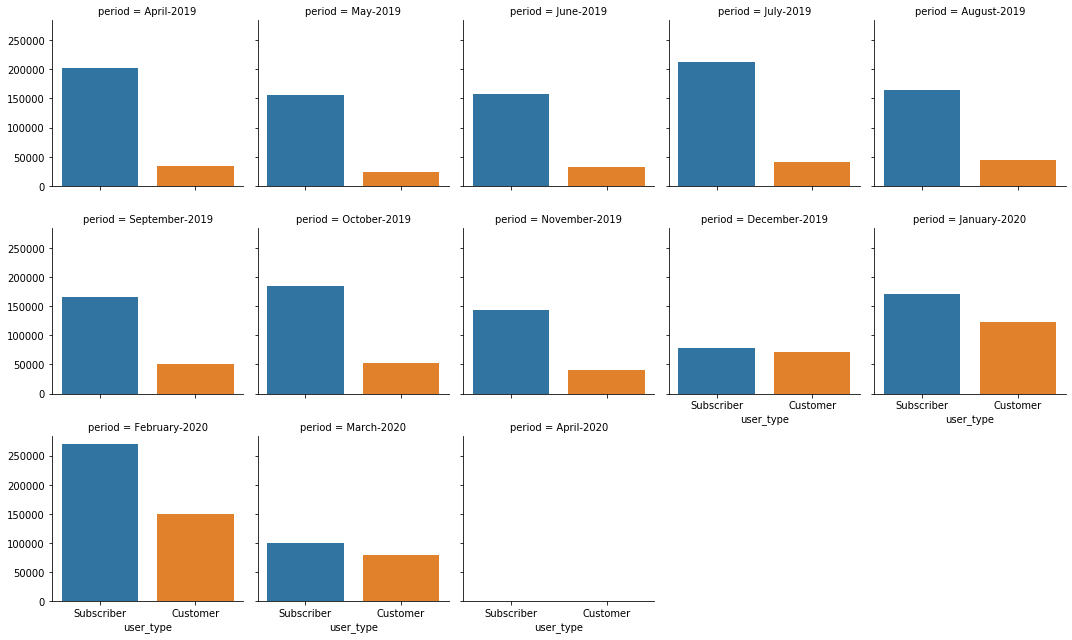

In [60]:
g = sns.FacetGrid(data = df_clean, col = 'period', col_wrap=5)
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'],palette=sns.color_palette())

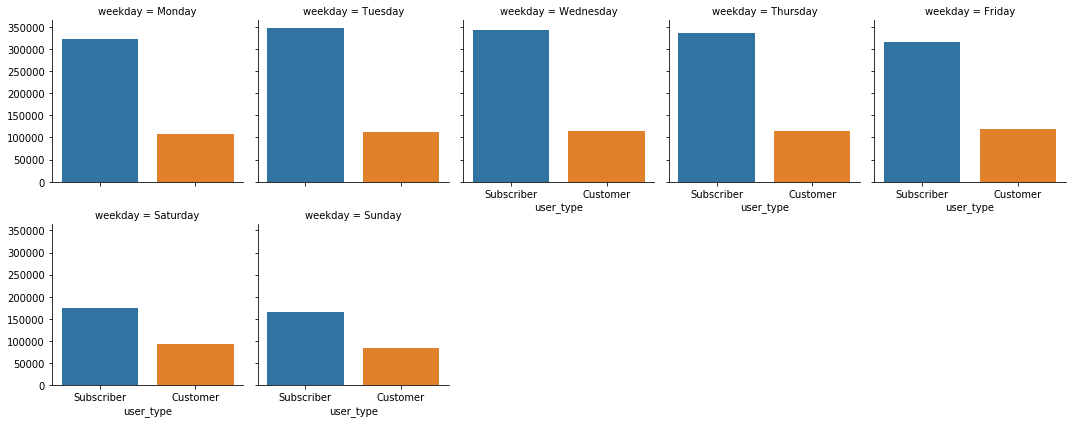

In [59]:
g = sns.FacetGrid(data = df_clean, col = 'weekday',col_wrap=5)
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'],palette=sns.color_palette())
#plt.xlim(0,5000)